In [27]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
os.chdir("/Users/ericaxia/Downloads/Github/554_Project_Code/Project/")
csv_files = []
myfile = "data_wanted.txt"
# text file where I specify which files I want to use
with open(myfile, "r") as f:
    lines = f.readlines()
    for l in lines:    
        file = l.rstrip("\n") + ".csv"
        csv_files.append(file)
print(csv_files)

['EASLFEIN.csv', 'EAPSFEIN.csv', 'EAPLFEIN.csv', 'EATLFEIN.csv', 'EASUFEIN.csv', '.csv']


In [14]:
# Read csv files from No Ceilings project folder
path = "/Users/ericaxia/Downloads/Github/project-girlboss/data/noceilings-data-master/csv"
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
# print(result)
# Narrow down to just the files I want
result2 = [f for f in result if f in csv_files]
dfs = []
for f in result2:
    df = pd.read_csv(f)
    dfs.append((f, df))    
print(f"Using {len(dfs)} csv files")

Using 5 csv files


In [15]:
# # EASUFEIN = Upper Secondary school female attainmet
# df_us = dfs[0][1]
# # df_us.head()
# ## gets rid of text dscrip at bottom
# df_us = df_us.iloc[0:121, :]
# # df_us.tail()
# col_nulls = df.isna().sum().sort_values()
# c = col_nulls.to_frame()
# c.reset_index(inplace=True)
# c.columns = ['Country', 'Num Nulls']
# print(c.iloc[0:4])
# ## pick a year with low amonut of nans
# ## e.g. 2012 

In [16]:
## Which year has least amount of missing data?
# for tup in dfs:
#     print(tup[0])
#     df_us = tup[1]
#     df_us = df_us.iloc[0:121, :]
#     col_nulls = df_us.isna().sum().sort_values()
#     c = col_nulls.to_frame()
#     c.reset_index(inplace=True)
#     c.columns = ['Country', 'Num Nulls']
#     print(c.iloc[0:4])
#     ## pick a year with low amonut of nans
#     ## e.g. 2012 seems like year that all DFs have low nans


## Let's narrow down to 2012 year only

In [17]:
os.chdir("/Users/ericaxia/Downloads/Github/554_Project_Code/Project/d3layout_data")

In [18]:

year = '2012'  # chosen year to graph


dfs_to_plot = []

for i in range(len(dfs)):
    # as a test, use first df for now
    name = dfs[i][0].strip(".csv")
    print(name)
    df = dfs[i][1]
    df = df.iloc[0:121, :] # TODO: better way to get rid of bottom text?
    df = df[['ISO', year]]
    # drop nans
    df.dropna(inplace=True)
    
    # df.columns = ['ISO', name]
    df.columns = ['name', 'value']
    # df.head()
    dfs_to_plot.append((name, df))
    print(df.shape)
    # df.to_json(f"{name}.json", orient='records')

EASUFEIN
(43, 2)
EAPSFEIN
(31, 2)
EAPLFEIN
(36, 2)
EATLFEIN
(42, 2)
EASLFEIN
(40, 2)


In [24]:
name = dfs_to_plot[0][0]
df = dfs_to_plot[0][1]
print(name)

df.columns = ['name', 'value']
df.head()

EASUFEIN


,name,value
4,AUS,75.0
5,AUT,69.8
15,BOL,37.3
18,BGR,70.6
25,CRI,38.0


EASUFEIN


<AxesSubplot:title={'center':'Female educational attainment % , upper secondary'}, xlabel='name', ylabel='value'>

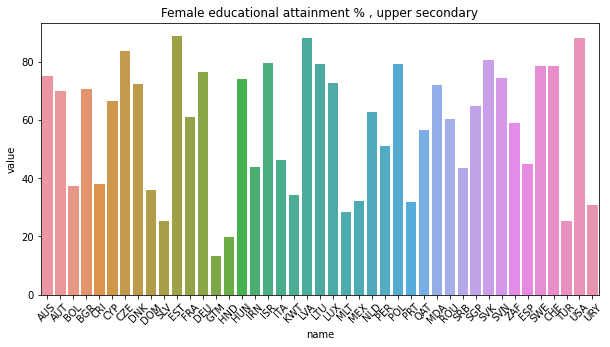

In [33]:
print(name)
plt.figure(figsize=(10,5))
plt.title("Female educational attainment % , upper secondary")
plt.xticks(rotation = 45)
sns.barplot(data=df, x='name', y='value')

# Ideal nested JSON format as final product
That we can plug right into the zoomable circle packing chart 
Let names = country or code code, values = percentage 

```
{
    "name": "education",
    "children": [
        {
            "name": "Primary School Education, Women age 25+",
            "children": [
                {
                    "value": 95,
                    "name": "USA"
                },
                ...
            ]
        },
        {
            "name": "Secondary School Education, Women age 25+",
            "children": [
                {
                    "value": 96,
                    "name": "USA"
                },
                ...
            ]
        },
        ...
    ]
}

```